In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

In [120]:
df = pd.read_excel("Loan_Modelling.xlsx")

In [157]:
df.head()  # Show the first few rows of your dataset


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predicted_CCAvg
0,25,1,49,4,1.6,1,0,0,1,0,0,0,1.377653
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1.096720
2,39,15,11,1,1.0,1,0,0,0,0,0,0,0.430921
3,35,9,100,1,2.7,2,0,0,0,0,0,0,2.722870
4,35,8,45,4,1.0,2,0,0,0,0,0,1,1.356357


In [158]:
df.describe()  # Get summary statistics for numerical columns

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predicted_CCAvg
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,1.938063
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,1.143235
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.130622
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.058402
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.690989
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,2.552029
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,5.757596


In [ ]:
df.shape

(5000, 13)

In [123]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='str')

In [124]:
column_names= df.columns

In [125]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [126]:
df.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [127]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [128]:
# Not required below columns
df = df.drop(['ID', 'ZIPCode'], axis=1)

In [129]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [160]:
# Data cleansing operation

# Fix negative Experience (if any)
if "Experience" in df.columns:
    neg_exp = (df["Experience"] < 0).sum()
    if neg_exp > 0:
        median_exp = df.loc[df["Experience"] >= 0, "Experience"].median()
        df.loc[df["Experience"] < 0, "Experience"] = median_exp
        print(f"Fixed {neg_exp} negative Experience values using median={median_exp}.")
    else:
        print("No negative Experience values found.")

# Drop identifier
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# Drop ZIPCode to avoid treating it as numeric (unless you one-hot encode)
if "ZIPCode" in df.columns:
    df = df.drop(columns=["ZIPCode"])

# Handle missing values (simple median fill for numeric)
num_cols = df.select_dtypes(include=[np.number]).columns
for c in num_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].median())

print("Missing values total:", df.isna().sum().sum())
display(df.describe(include="all"))


Fixed 52 negative Experience values using median=20.0.
Missing values total: 0


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predicted_CCAvg
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,1.938063
std,11.463166,11.253035,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,1.143235
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.130622
25%,35.000000,11.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.058402
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.690989
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,2.552029
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,5.757596


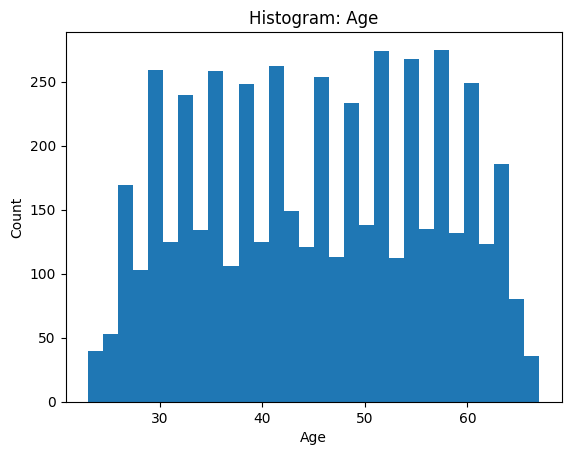

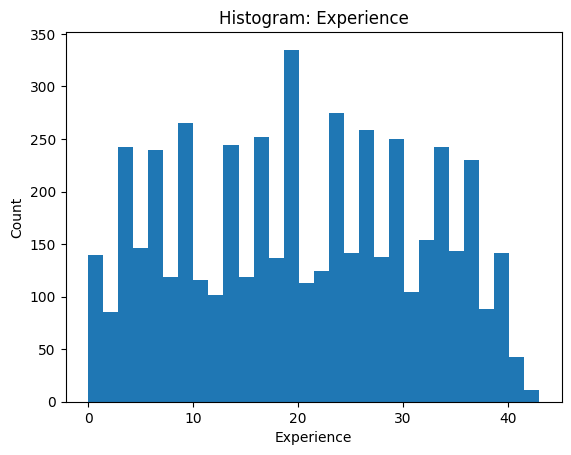

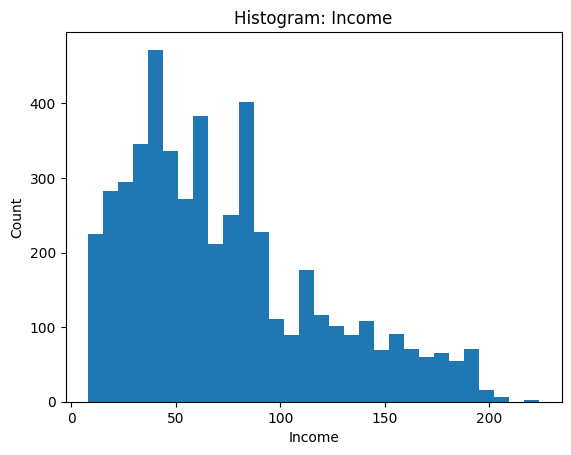

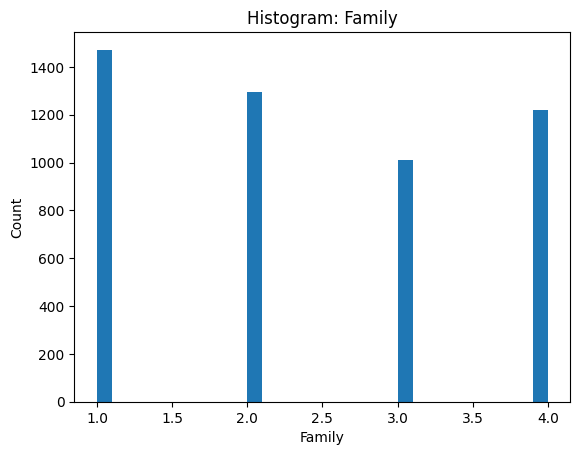

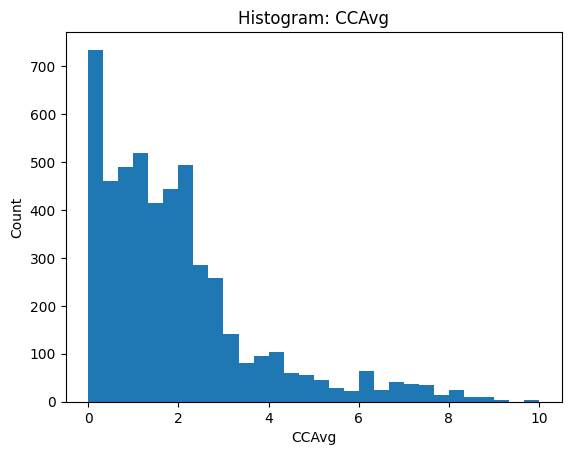

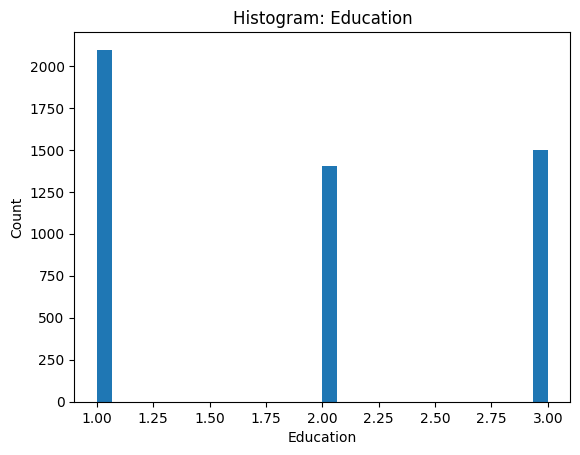

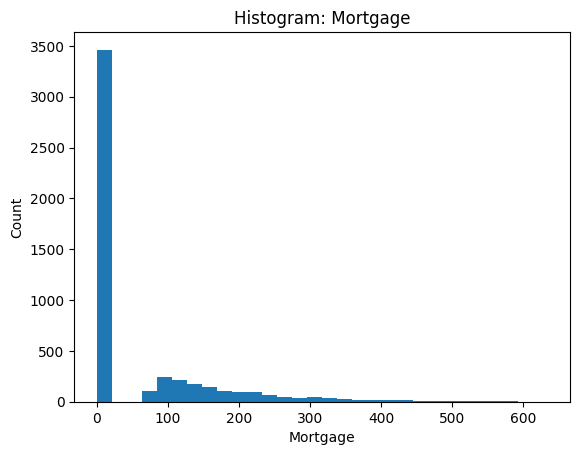

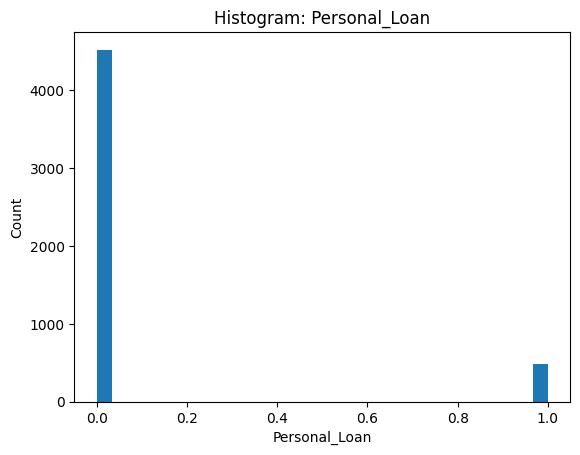

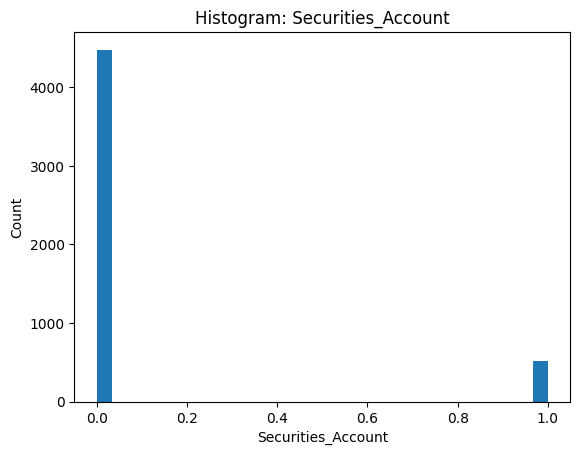

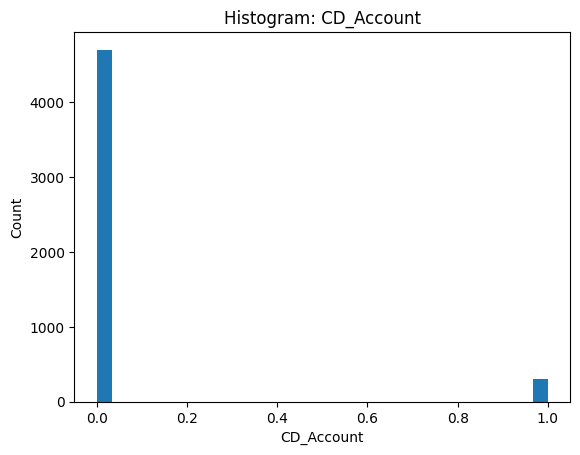

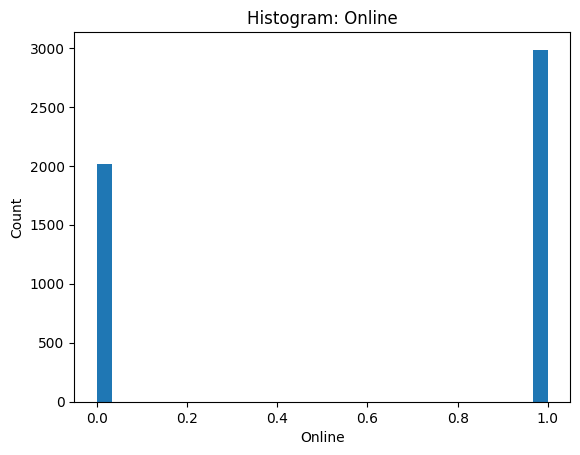

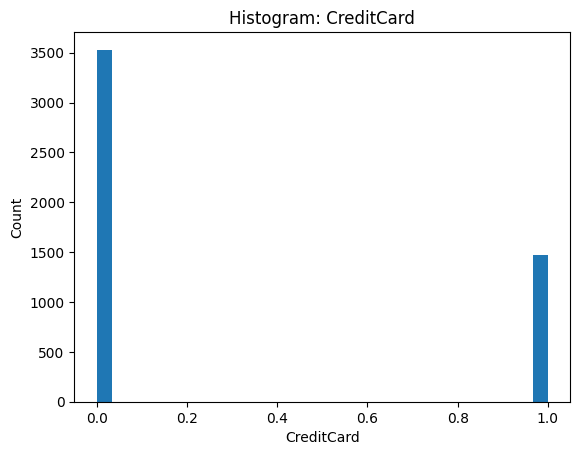

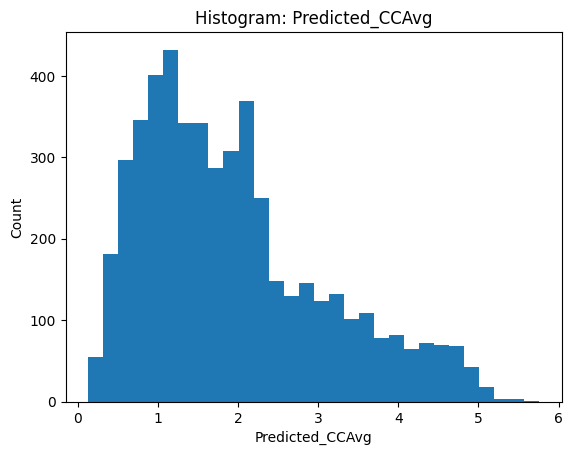

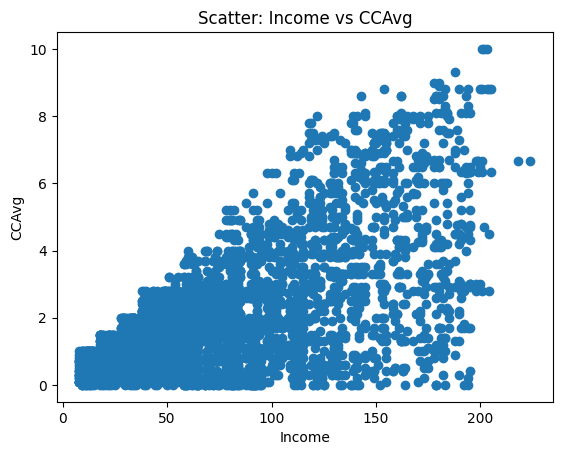

<Figure size 640x480 with 0 Axes>

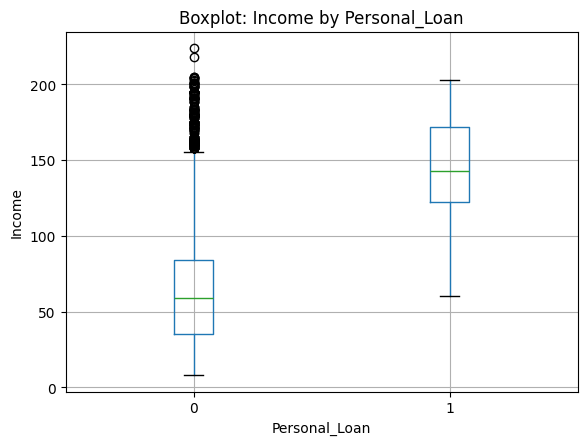

In [161]:
# Univariate + bivariate EDA
target_reg = "CCAvg"
target_clf = "Personal_Loan"

# Univariate: histograms
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Bivariate: Income vs CCAvg scatter
if "Income" in df.columns and "CCAvg" in df.columns:
    plt.figure()
    plt.scatter(df["Income"], df["CCAvg"])
    plt.title("Scatter: Income vs CCAvg")
    plt.xlabel("Income")
    plt.ylabel("CCAvg")
    plt.show()

# Bivariate: boxplot of Income by loan class
if "Income" in df.columns and target_clf in df.columns:
    plt.figure()
    df.boxplot(column="Income", by=target_clf)
    plt.title("Boxplot: Income by Personal_Loan")
    plt.suptitle("")
    plt.xlabel("Personal_Loan")
    plt.ylabel("Income")
    plt.show()


Correlation analysis


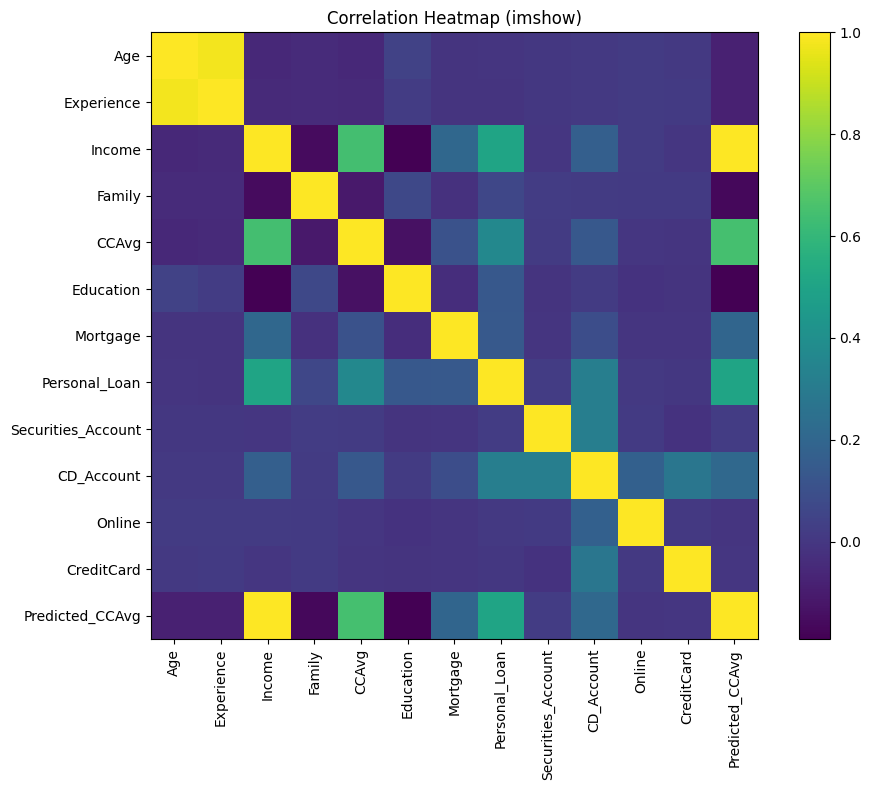

Top correlations with Personal_Loan (if present):
Personal_Loan         1.000000
Predicted_CCAvg       0.506532
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
Age                  -0.007726
Experience           -0.014013
Name: Personal_Loan, dtype: float64


In [162]:
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (imshow)")
plt.colorbar()
plt.tight_layout()
plt.show()

print("Top correlations with Personal_Loan (if present):")
if "Personal_Loan" in corr.columns:
    print(corr["Personal_Loan"].sort_values(ascending=False))

Part A — Regression (Target: CCAvg)


Correlation analysis



In [163]:

from sklearn.linear_model import LinearRegression

target_reg = "CCAvg"
target_clf = "Personal_Loan"

reg_features = [c for c in df.columns if c not in [target_reg, target_clf]]
X_reg = df[reg_features]
y_reg = df[target_reg]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.30, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg_sc = scaler_reg.fit_transform(X_train_reg)
X_test_reg_sc  = scaler_reg.transform(X_test_reg)

reg_model = LinearRegression()
reg_model.fit(X_train_reg_sc, y_train_reg)

y_train_pred = reg_model.predict(X_train_reg_sc)
y_test_pred  = reg_model.predict(X_test_reg_sc)

train_rmse = np.sqrt(mean_squared_error(y_train_reg, y_train_pred))
test_rmse  = np.sqrt(mean_squared_error(y_test_reg, y_test_pred))
train_r2   = r2_score(y_train_reg, y_train_pred)
test_r2    = r2_score(y_test_reg, y_test_pred)

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE : {test_rmse:.4f}")
print(f"Train R2  : {train_r2:.4f}")
print(f"Test R2   : {test_r2:.4f}")

# Coefficients (scaled)
coef_df = pd.DataFrame({"Feature": reg_features, "Coefficient": reg_model.coef_}).sort_values("Coefficient", ascending=False)
display(coef_df)

# Create Predicted_CCAvg (fit on full data)
X_reg_sc_full = StandardScaler().fit_transform(X_reg)
reg_model_full = LinearRegression().fit(X_reg_sc_full, y_reg)
df["Predicted_CCAvg"] = reg_model_full.predict(X_reg_sc_full)

display(df[[target_reg, "Predicted_CCAvg"]].head())


Train RMSE: 1.3317
Test RMSE : 1.3248
Train R2  : 0.4204
Test R2   : 0.4226


,Feature,Coefficient
10,Predicted_CCAvg,1.426532
1,Experience,0.226381
8,Online,0.008344
4,Education,0.007289
5,Mortgage,0.004737
9,CreditCard,0.004095
3,Family,0.003161
6,Securities_Account,-0.002479
7,CD_Account,-0.014462
0,Age,-0.213367


,CCAvg,Predicted_CCAvg
0,1.6,1.420761
1,1.5,1.142911
2,1.0,0.490104
3,2.7,2.726145
4,1.0,1.337494


Part B — Classification (Target: Personal_Loan)

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Target columns
target_reg = "CCAvg"
target_clf = "Personal_Loan"

# Feature selection (exclude targets)
clf_features = [c for c in df.columns if c not in [target_clf, target_reg]]

# Optional: Remove Experience if Age exists (to reduce redundancy)
if "Experience" in clf_features and "Age" in clf_features:
    clf_features.remove("Experience")

# Define X and y
X = df[clf_features]
y = df[target_clf]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# Logistic Regression model
clf_model = LogisticRegression(class_weight="balanced", max_iter=2000)
clf_model.fit(X_train_sc, y_train)

# Predictions
y_pred = clf_model.predict(X_test_sc)

# Evaluation
print(classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix [[TN, FP],[FN, TP]]:")
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1356
           1       0.47      0.91      0.62       144

    accuracy                           0.89      1500
   macro avg       0.73      0.90      0.78      1500
weighted avg       0.94      0.89      0.91      1500

Confusion Matrix [[TN, FP],[FN, TP]]:
[[1211  145]
 [  13  131]]


# Short business notes


In [ ]:
#Short business notes
#Predicted_CCAvg is an engineered behavioral feature.
#For imbalanced Personal_Loan, report class-1 precision/recall/F1 and confusion matrix.
#Marketing context: higher recall can be acceptable if outreach cost is low.